We begin with importing the necessary libraries 

In [21]:
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


In [22]:
labels = pd.read_csv("Galaxy_data/training_solutions_rev1.csv")

labels.shape

(61578, 38)

#Exploratory Data Analysis & feature preprocessing

The instances of all classes where the confidence level was above 0.5 was analysed .

In [23]:
df = labels.drop('GalaxyID', axis=1)
filtered_df = df[df > 0.5]
filtered_df.columns

Index(['Class1.1', 'Class1.2', 'Class1.3', 'Class2.1', 'Class2.2', 'Class3.1',
       'Class3.2', 'Class4.1', 'Class4.2', 'Class5.1', 'Class5.2', 'Class5.3',
       'Class5.4', 'Class6.1', 'Class6.2', 'Class7.1', 'Class7.2', 'Class7.3',
       'Class8.1', 'Class8.2', 'Class8.3', 'Class8.4', 'Class8.5', 'Class8.6',
       'Class8.7', 'Class9.1', 'Class9.2', 'Class9.3', 'Class10.1',
       'Class10.2', 'Class10.3', 'Class11.1', 'Class11.2', 'Class11.3',
       'Class11.4', 'Class11.5', 'Class11.6'],
      dtype='object')

# Basic information about the DataFrame,

In [24]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61578 entries, 0 to 61577
Data columns (total 37 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Class1.1   61578 non-null  float64
 1   Class1.2   61578 non-null  float64
 2   Class1.3   61578 non-null  float64
 3   Class2.1   61578 non-null  float64
 4   Class2.2   61578 non-null  float64
 5   Class3.1   61578 non-null  float64
 6   Class3.2   61578 non-null  float64
 7   Class4.1   61578 non-null  float64
 8   Class4.2   61578 non-null  float64
 9   Class5.1   61578 non-null  float64
 10  Class5.2   61578 non-null  float64
 11  Class5.3   61578 non-null  float64
 12  Class5.4   61578 non-null  float64
 13  Class6.1   61578 non-null  float64
 14  Class6.2   61578 non-null  float64
 15  Class7.1   61578 non-null  float64
 16  Class7.2   61578 non-null  float64
 17  Class7.3   61578 non-null  float64
 18  Class8.1   61578 non-null  float64
 19  Class8.2   61578 non-null  float64
 20  Class8

# Descriptive statistics for numerical columns

In [25]:
print(df.describe())

           Class1.1      Class1.2      Class1.3      Class2.1      Class2.2  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.432526      0.542261      0.025213      0.106408      0.435854   
std        0.283517      0.296429      0.037967      0.212505      0.301867   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.175812      0.280862      0.000000      0.000000      0.168490   
50%        0.416994      0.558754      0.014870      0.000000      0.394850   
75%        0.679182      0.811339      0.034325      0.085161      0.694615   
max        1.000000      1.000000      0.935147      1.000000      1.000000   

           Class3.1      Class3.2      Class4.1      Class4.2      Class5.1  \
count  61578.000000  61578.000000  61578.000000  61578.000000  61578.000000   
mean       0.102526      0.333328      0.215629      0.220224      0.040842   
std        0.177301      0.247675      0.285502    

# Checking nan and infs

In [26]:
print(df.isnull().sum())

Class1.1     0
Class1.2     0
Class1.3     0
Class2.1     0
Class2.2     0
Class3.1     0
Class3.2     0
Class4.1     0
Class4.2     0
Class5.1     0
Class5.2     0
Class5.3     0
Class5.4     0
Class6.1     0
Class6.2     0
Class7.1     0
Class7.2     0
Class7.3     0
Class8.1     0
Class8.2     0
Class8.3     0
Class8.4     0
Class8.5     0
Class8.6     0
Class8.7     0
Class9.1     0
Class9.2     0
Class9.3     0
Class10.1    0
Class10.2    0
Class10.3    0
Class11.1    0
Class11.2    0
Class11.3    0
Class11.4    0
Class11.5    0
Class11.6    0
dtype: int64


# Visualizing the data

/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: Fut

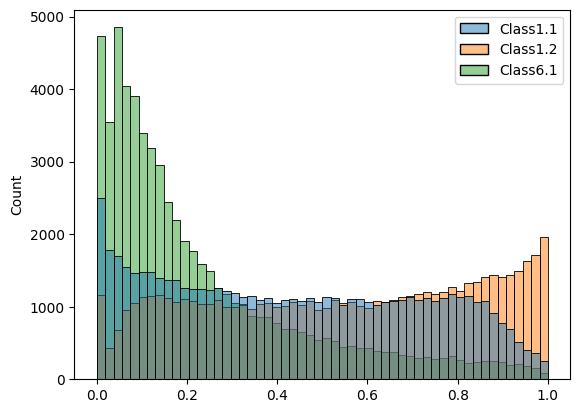

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = ["Class1.1", "Class1.2", "Class6.1"]

sns.histplot(df[mask])
plt.show()

# Correlation Analysis

In [28]:
print(df.corr())

           Class1.1  Class1.2  Class1.3  Class2.1  Class2.2  Class3.1  \
Class1.1   1.000000 -0.992416  0.280863 -0.324072 -0.746400 -0.481550   
Class1.2  -0.992416  1.000000 -0.396710  0.332616  0.747833  0.481963   
Class1.3   0.280863 -0.396710  1.000000 -0.176915 -0.265020 -0.166986   
Class2.1  -0.324072  0.332616 -0.176915  1.000000 -0.377346 -0.140077   
Class2.2  -0.746400  0.747833 -0.265020 -0.377346  1.000000  0.571890   
Class3.1  -0.481550  0.481963 -0.166986 -0.140077  0.571890  1.000000   
Class3.2  -0.564992  0.566443 -0.203469 -0.359635  0.809411 -0.018839   
Class4.1  -0.670888  0.671806 -0.235320 -0.219080  0.813928  0.549446   
Class4.2  -0.187805  0.188752 -0.071268 -0.285599  0.386405  0.087674   
Class5.1  -0.229011  0.218291  0.005816 -0.080338  0.270914  0.099202   
Class5.2  -0.604714  0.608157 -0.232529 -0.229661  0.758875  0.402144   
Class5.3  -0.442142  0.447578 -0.192799 -0.285051  0.640182  0.429009   
Class5.4  -0.152129  0.147603 -0.016395 -0.187159  

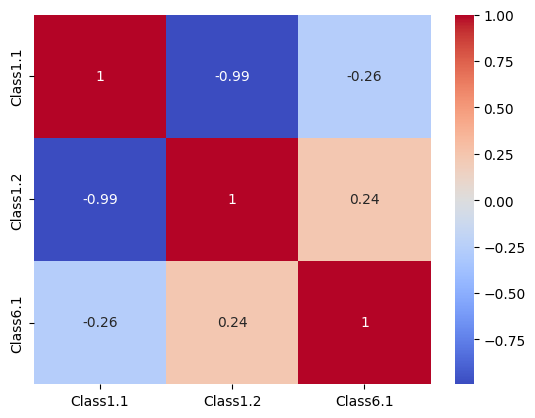

In [29]:
sns.heatmap(df[mask].corr(), annot=True, cmap='coolwarm')
plt.show()

# Boxplot

/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


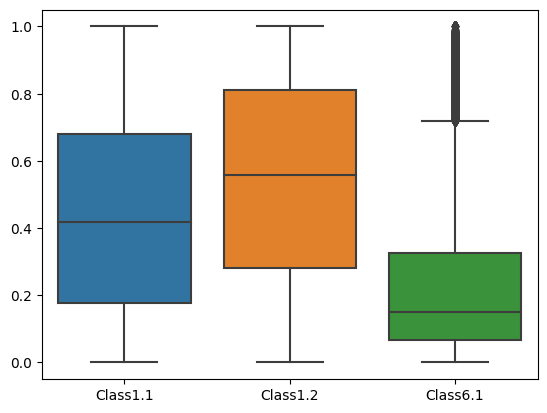

In [30]:
sns.boxplot(df[mask])
plt.show()

# air Plots

/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/leonardo/home/userexternal/zdahbi00/.conda/envs/mhpc/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: Fut

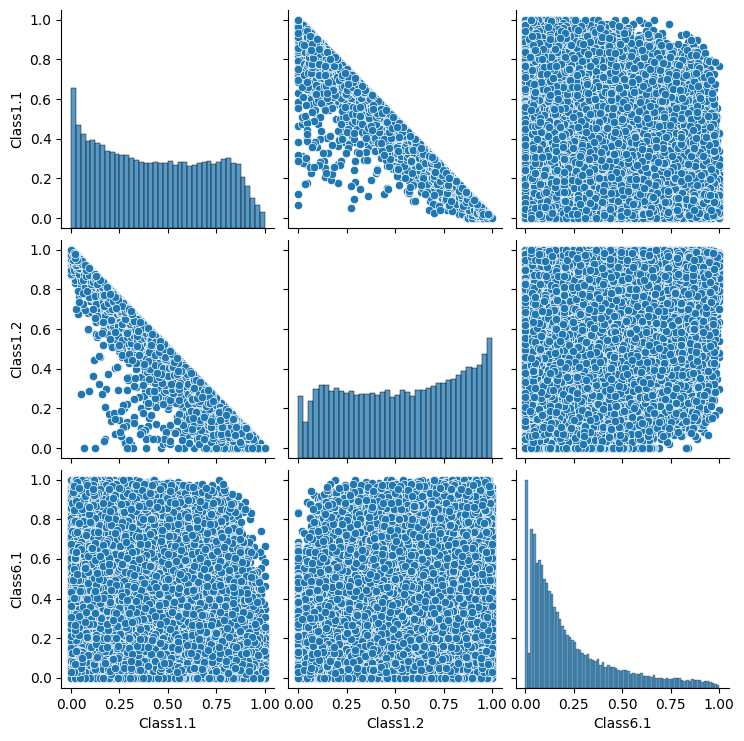

In [31]:
sns.pairplot(df[mask])
plt.show()

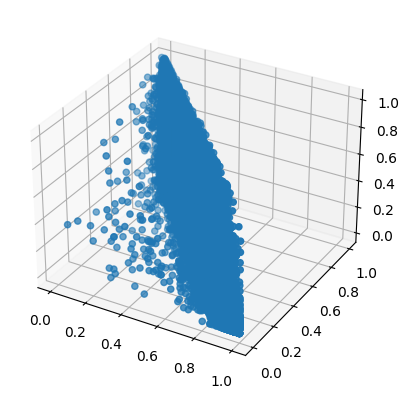

In [32]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Class1.1'], df['Class1.2'], df['Class6.1'])
plt.show()

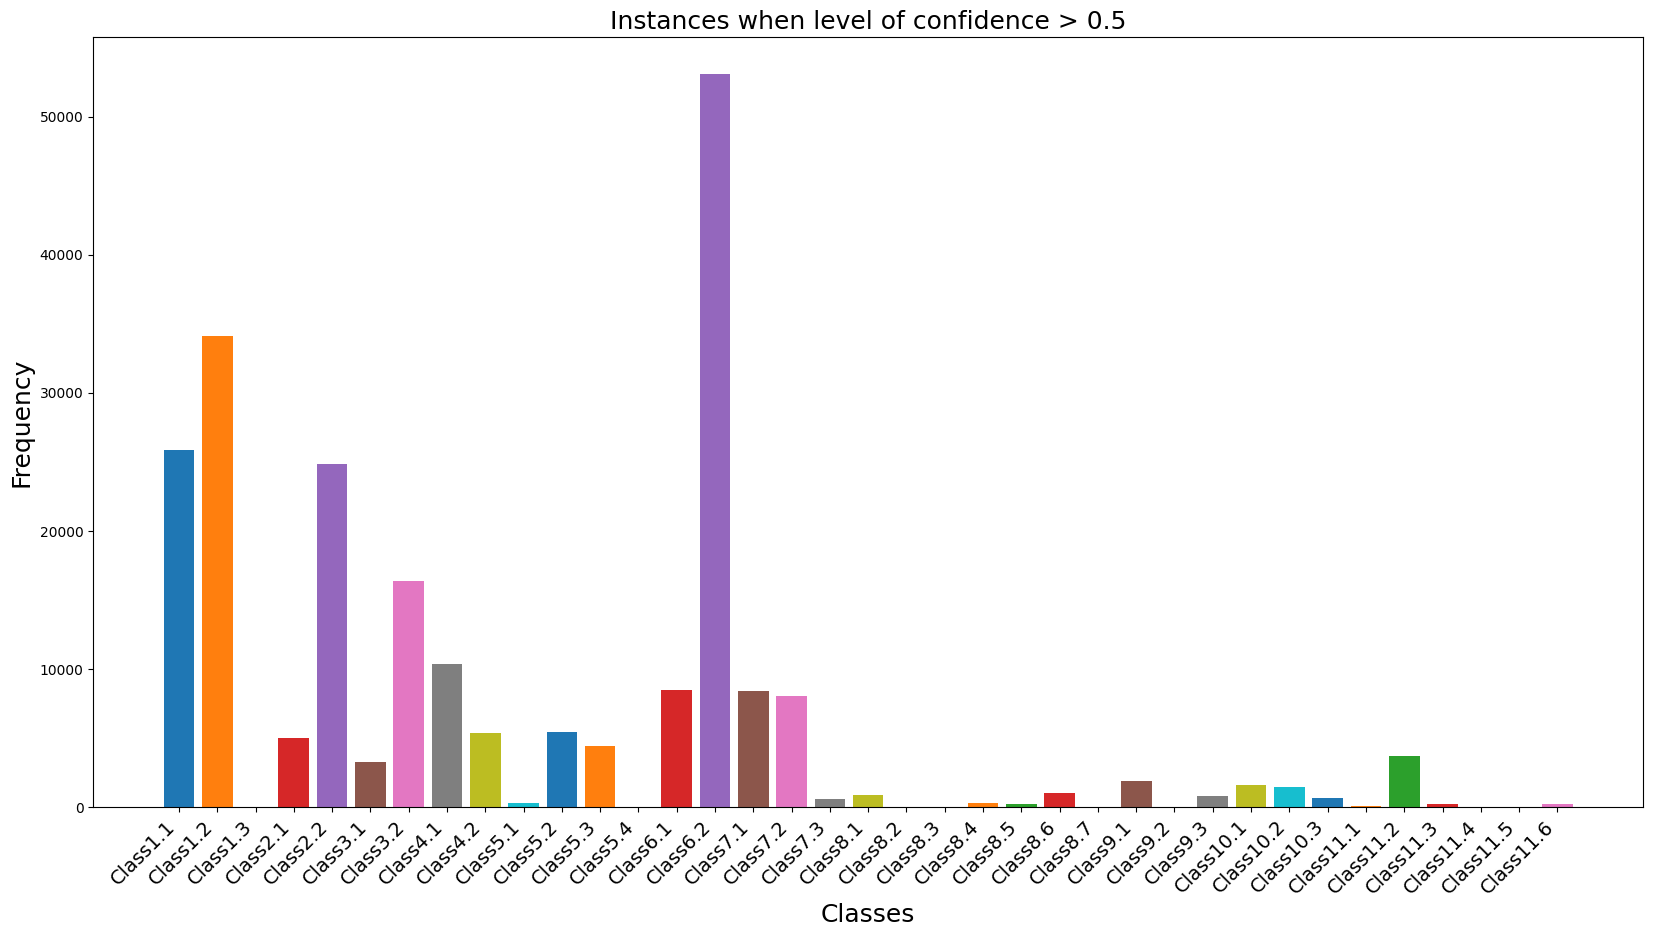

In [33]:
num_columns = len(filtered_df.columns)
x = np.arange(num_columns)
width = 0.8


fig, ax = plt.subplots(figsize=(20, 10))
for i, column in enumerate(filtered_df.columns):
    ax.bar(x[i], filtered_df[column].count(), width, label=column)

ax.set_xlabel('Classes', fontsize = 18)
ax.set_ylabel('Frequency', fontsize = 18)
ax.set_title('Instances when level of confidence > {}'.format(0.5), fontsize = 18)
ax.set_xticks(x )
ax.set_xticklabels(filtered_df.columns, rotation=45, ha='right', fontsize = 14)  


plt.show()

Notice that two classes with most responses of high confidence level are 1 and 6. We decided to reduce our features based on this observation and selected classes 1.1,1.2 and 6.1 . These three features will be used to determine if a galaxy is elliptical,spiral or odd

In [34]:
pd.set_option('display.max_columns',None)
labels=labels.drop(labels[labels['Class1.3'] > 0.5].index)

In [35]:
labels = labels[['GalaxyID', 'Class1.1', 'Class1.2', 'Class6.1']]
labels['Result'] = 'i'
labels.loc[(labels['Class1.1'] > 0.7 ) & (labels['Class1.2'] < 0.3 ) & (labels['Class6.1'] < 0.1 ), 'Result'] = 'e'
labels.loc[(labels['Class1.1'] < 0.3 ) & (labels['Class1.2'] > 0.7 ) & (labels['Class6.1'] < 0.1 ) , 'Result'] = 's'
labels.loc[ (labels['Class6.1'] > 0.63 ), 'Result'] = 'o'

In [36]:
labels.head()

,GalaxyID,Class1.1,Class1.2,Class6.1,Result
0,100008,0.383147,0.616853,0.054453,i
1,100023,0.327001,0.663777,0.189149,i
2,100053,0.765717,0.177352,0.000000,e
3,100078,0.693377,0.238564,0.320398,i
4,100090,0.933839,0.000000,0.029383,e


In [37]:
labels.info()


<class 'pandas.core.frame.DataFrame'>
Index: 61534 entries, 0 to 61577
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   GalaxyID  61534 non-null  int64  
 1   Class1.1  61534 non-null  float64
 2   Class1.2  61534 non-null  float64
 3   Class6.1  61534 non-null  float64
 4   Result    61534 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 2.8+ MB


We further reduced our data set and by taking 5000 values of each of the three selected classes so as to be computationally efficient, ending up with 15000 rows of sample data.

In [38]:
elip_df = labels[labels['Result'] == 'e']
spiral_df = labels[labels['Result'] == 's']
odd_df = labels[labels['Result'] == 'o']

# Sample 5000 values from each category
category1_sampled = elip_df.sample(n=5000, random_state=42)
category2_sampled = spiral_df.sample(n=5000, random_state=42)
category3_sampled = odd_df.sample(n=5000, random_state=42)

# Concatenate the sampled DataFrames back together
sampled_df = pd.concat([category1_sampled, category2_sampled, category3_sampled])

galaxy =  sampled_df.sort_values(by='GalaxyID')

print(galaxy)


       GalaxyID  Class1.1  Class1.2  Class6.1 Result
2        100053  0.765717  0.177352  0.000000      e
6        100123  0.462492  0.456033  0.687647      o
16       100263  0.179654  0.818530  0.913055      o
19       100322  0.091987  0.908013  0.000000      s
30       100458  0.820908  0.081499  0.921161      o
...         ...       ...       ...       ...    ...
61564    999781  0.848000  0.064000  0.047000      e
61568    999875  0.020285  0.979715  0.071272      s
61570    999893  0.410999  0.519560  0.801448      o
61575    999958  0.202841  0.777376  0.839186      o
61576    999964  0.091000  0.909000  0.864000      o

[15000 rows x 5 columns]


In [39]:
# Filter rows where 'Result' is 'o'
result_o = labels[(labels['Result'] == 'o')  ]

# Display the resulting DataFrame
print(result_o)


       GalaxyID  Class1.1  Class1.2  Class6.1 Result
6        100123  0.462492  0.456033  0.687647      o
16       100263  0.179654  0.818530  0.913055      o
30       100458  0.820908  0.081499  0.921161      o
34       100513  0.275971  0.700977  0.881950      o
35       100520  0.042430  0.957570  0.887464      o
...         ...       ...       ...       ...    ...
61503    998662  0.719718  0.224321  0.777993      o
61509    998789  0.730443  0.239014  0.881488      o
61570    999893  0.410999  0.519560  0.801448      o
61575    999958  0.202841  0.777376  0.839186      o
61576    999964  0.091000  0.909000  0.864000      o

[5217 rows x 5 columns]


In [40]:
labels=labels.drop(labels[labels['Result'] == 'i'].index)
print(labels)

       GalaxyID  Class1.1  Class1.2  Class6.1 Result
2        100053  0.765717  0.177352  0.000000      e
4        100090  0.933839  0.000000  0.029383      e
6        100123  0.462492  0.456033  0.687647      o
16       100263  0.179654  0.818530  0.913055      o
19       100322  0.091987  0.908013  0.000000      s
...         ...       ...       ...       ...    ...
61565    999786  0.800415  0.165614  0.086267      e
61568    999875  0.020285  0.979715  0.071272      s
61570    999893  0.410999  0.519560  0.801448      o
61575    999958  0.202841  0.777376  0.839186      o
61576    999964  0.091000  0.909000  0.864000      o

[18054 rows x 5 columns]


In [41]:
galaxy_ids = labels['GalaxyID'].to_numpy()

# Display the array of GalaxyID
print(galaxy_ids)

[100053 100090 100123 ... 999893 999958 999964]


In [13]:
from PIL import Image, ImageOps
from numpy import asarray
import os

folder_path = "Galaxy_data/images_training_rev1/"
output_dict = {}

for galaxy_id in galaxy_ids:
    filename = f"{galaxy_id}.jpg"
    filepath = os.path.join(folder_path, filename)

    if os.path.exists(filepath):
        # load the image and convert into numpy array
        img = Image.open(filepath)
        img_gray = ImageOps.grayscale(img)
        numpydata = asarray(img_gray).flatten()

        # store the numpy array in the dictionary with the galaxy_id as the key
        output_dict[galaxy_id] = numpydata

# Now output_dict contains numpy arrays for all specified galaxy IDs


In [ ]:
import numpy as np
x=np.array(list(output_dict.values())).mean()

In [42]:
#import csv


# Specify the CSV file path
#csv_file_path = 'galaxy.csv'

# Writing the data to the CSV file
#with open(csv_file_path, 'w', newline='') as csv_file:
#    csv_writer = csv.writer(csv_file)

    # Write the header row with keys as column names
#    header = ['GalaxyID'] + [f'Pixel_{i}' for i in range(len(output_dict[100008].ravel()))]
#    csv_writer.writerow(header)

    # Write data rows
#    for key, value in output_dict.items():
        # Flatten the array to a 1D list for the row
#        row_data = [key] + value.ravel().tolist()
#        csv_writer.writerow(row_data)

#print(f'CSV file has been created at: {csv_file_path}')


# Loading data

The data we are loading is already procceed by the script in img_processing.ipynb. This is just to save time when procceding with other tasks such as pca and visualizations. 

In [48]:
saving_path = "proccessed_data/"
cropped_galaxy_imgs = np.load(saving_path + "cropped_galaxy_imgs.npy", allow_pickle=True).item()
original_galaxy_imgs = np.load(saving_path + "original_galaxy_imgs.npy", allow_pickle=True).item()

In [44]:
import matplotlib.pyplot as plt

IMG_DIR="Galaxy_data/images_training_rev1" 


sample = ['Elliptical', 'Spiral', 'Odd']

def conv_str(letter):
    for word in sample:
        if letter == word[0]:
            str_ans = word
    return str_ans


# function that takes GalaxyID and check the class of it
def check_class(data, imgID):
    what_is_this = data[data["GalaxyID"] == imgID]
    sample = ['Elliptical', ]
    
    return conv_str(list(what_is_this["Result"])[0].upper())


# function to plot different imgs stored in the dict
def plot_list(data_dict, df, n_imgs):
    fig, ax = plt.subplots(figsize = (30, 30))
    ax.remove()
    count = 0
    for i in list(df["GalaxyID"].index):
        if(count < n_imgs):
            plt.subplot(4, 4, count + 1)
            count += 1
            imgID = labels["GalaxyID"][i]
            plt.title(f"ID: {imgID} -> {check_class(df, imgID)}", y=1.02, fontsize=20)
            img = data_dict[imgID]
            plt.axis('off')
            plt.imshow(img, cmap='gray', vmin = 0, vmax = 255)


# function to plot different imgs stored in the dict
def plot_one(data_dict, df, imgID):
    fig, ax = plt.subplots(figsize = (20, 20))
    ax.remove()
    plt.subplot(5, 5, 1)
    plt.title(f"GalaxyID: {imgID} -> Class: {check_class(df, imgID)}", y=1.02, fontsize=10, fontweight="bold")
    img = list(data_dict[imgID])
    plt.imshow(img)

# Cropped images

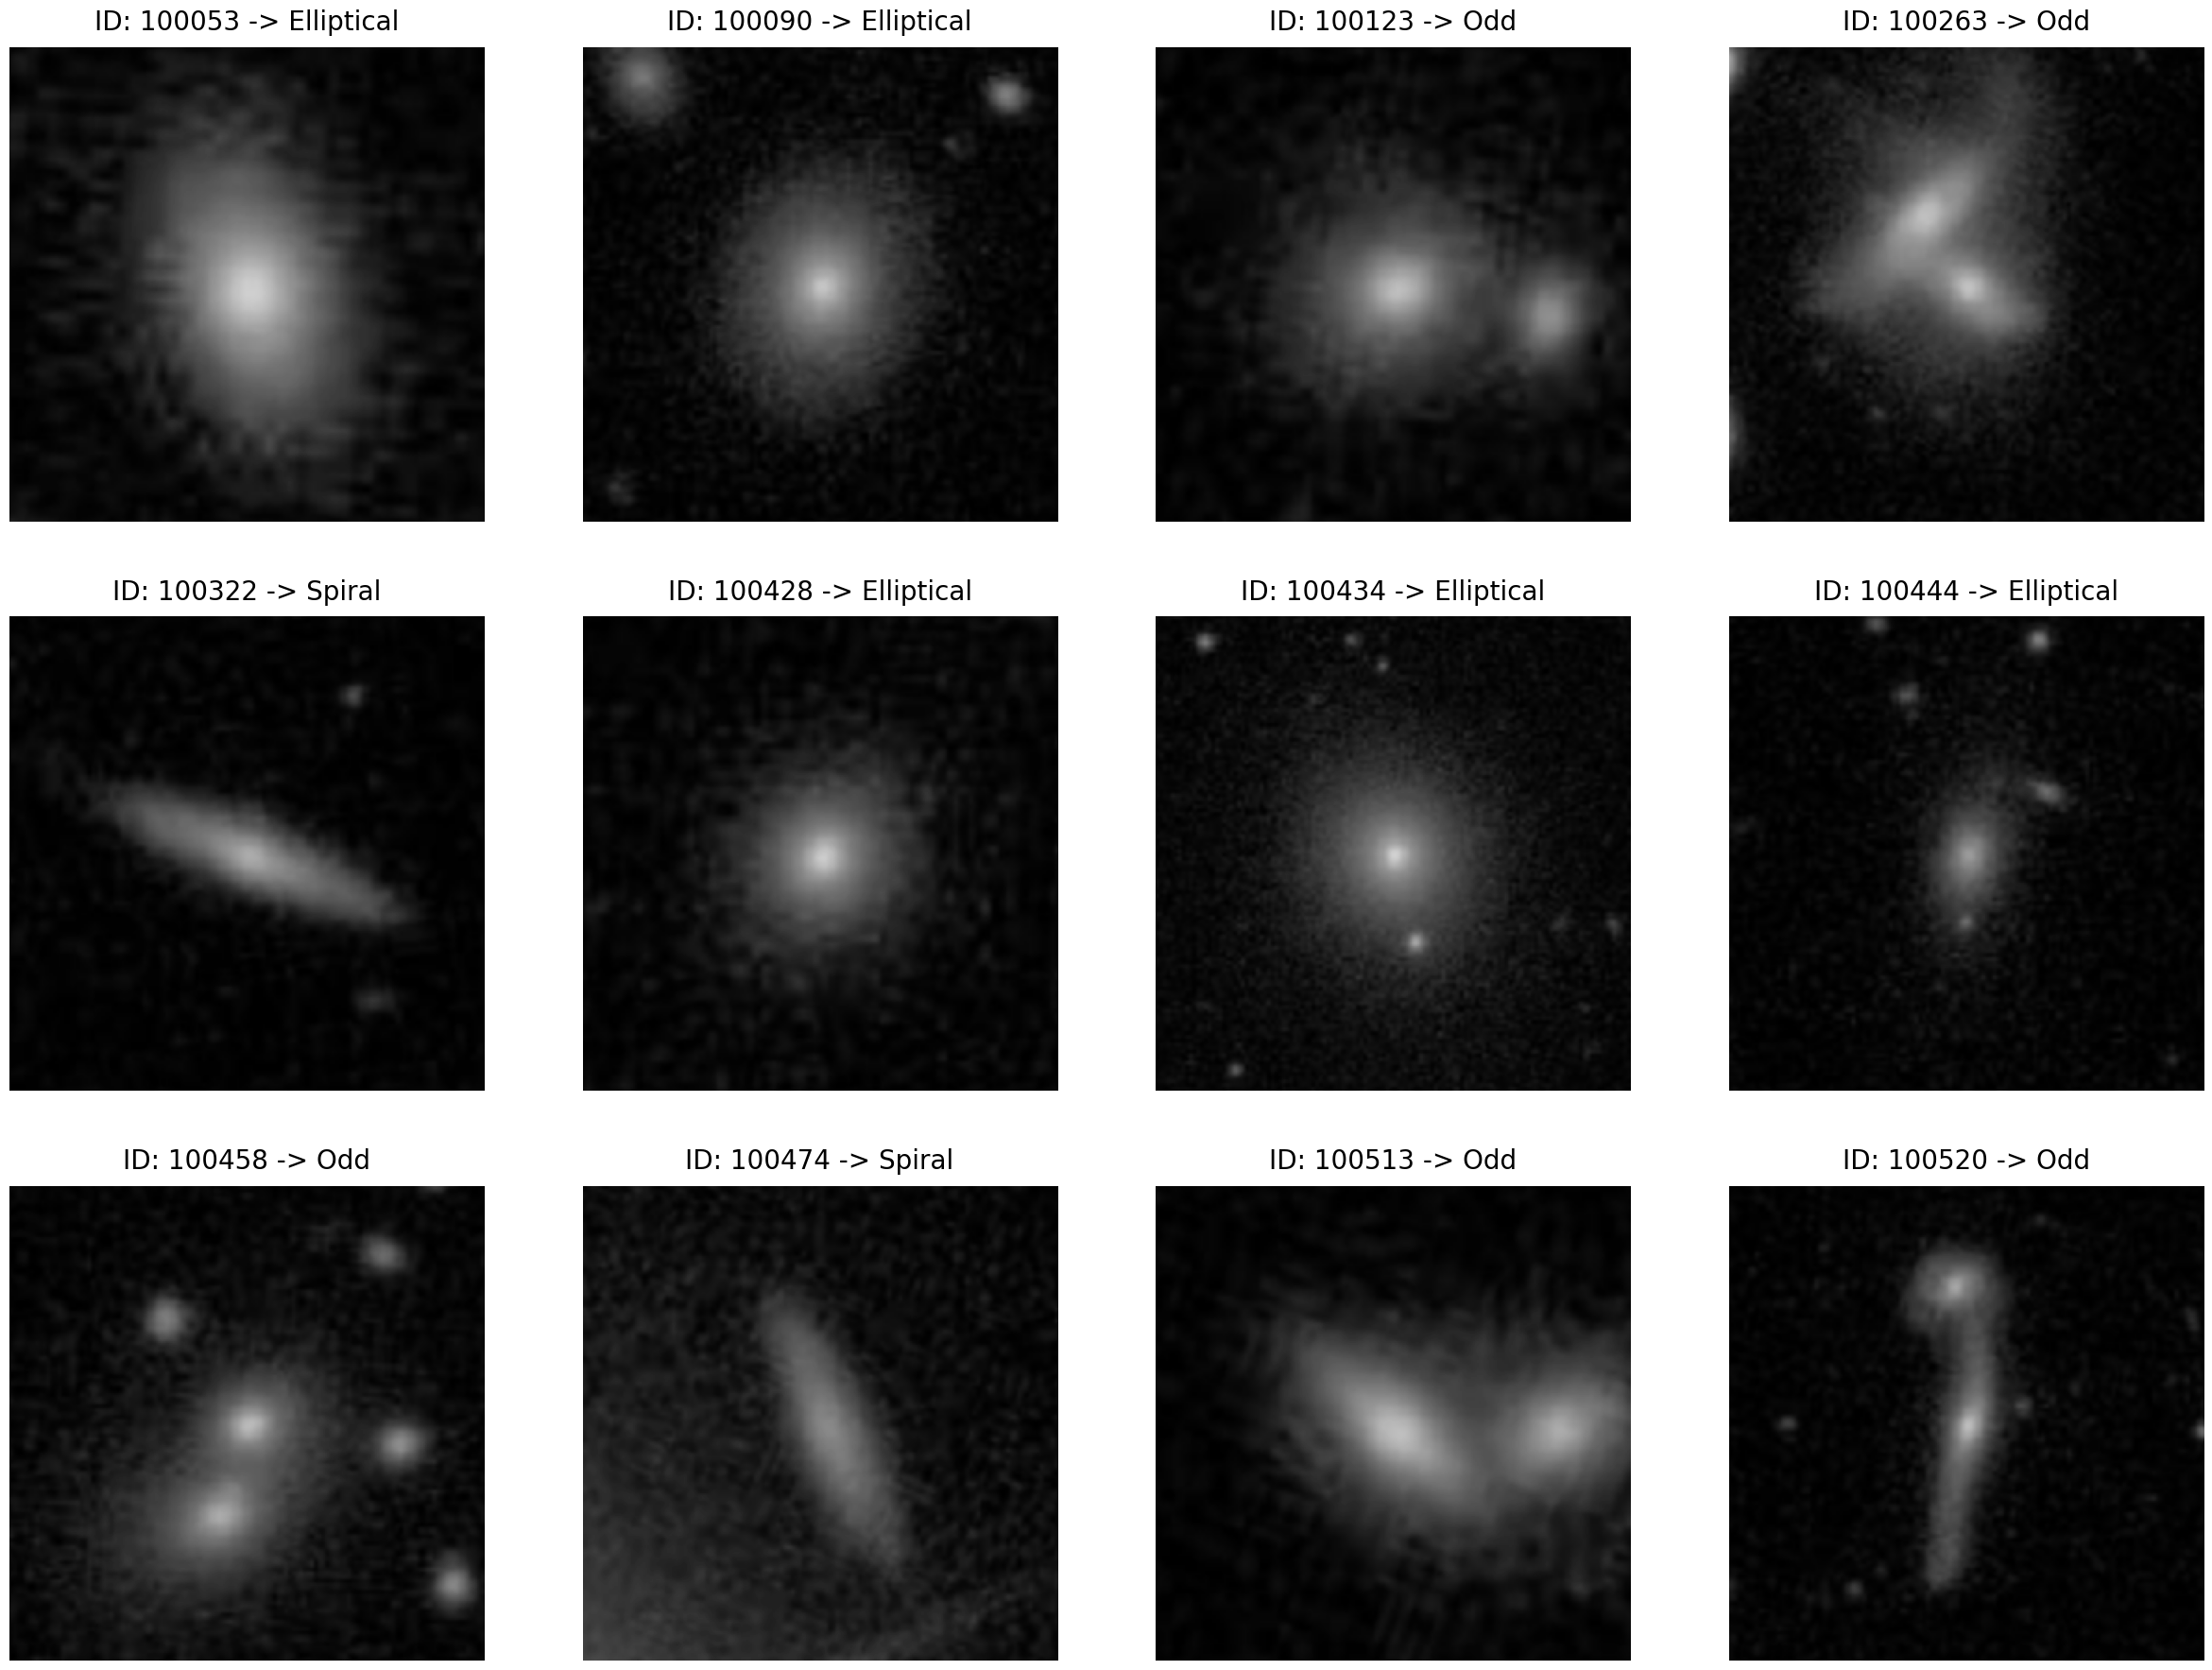

In [52]:
plot_list(cropped_galaxy_imgs, labels, 12)

# Original images

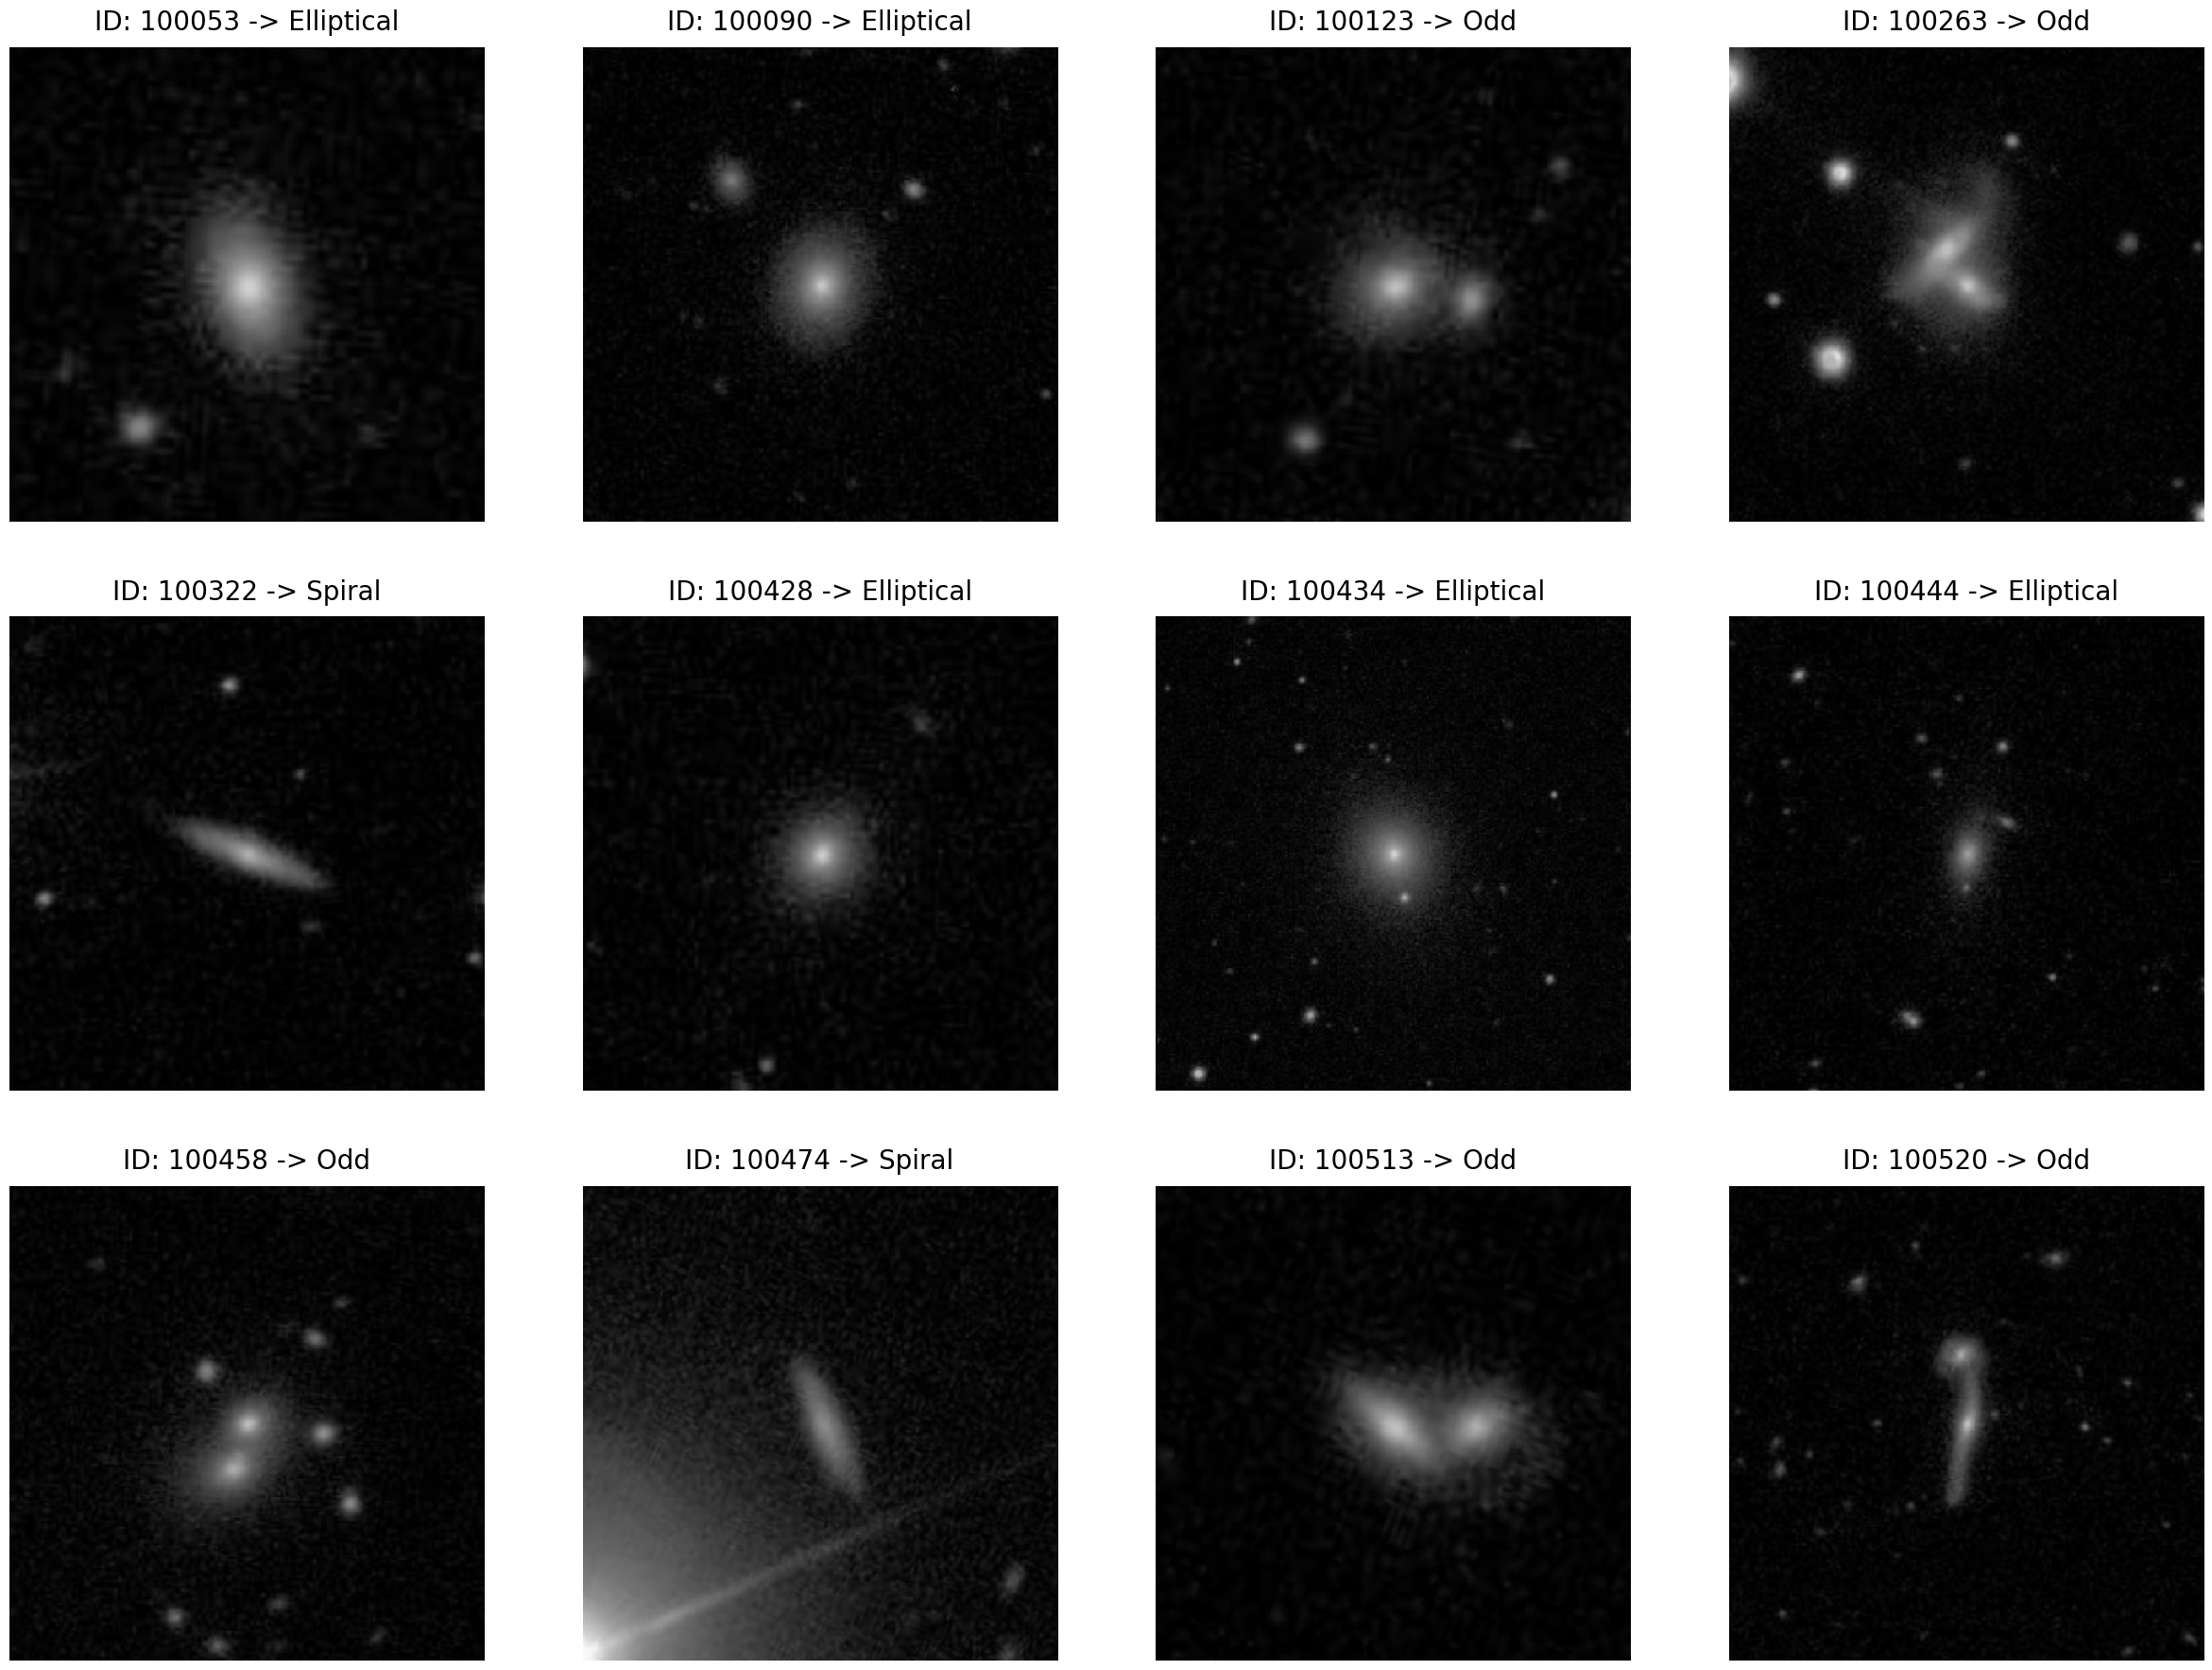

In [55]:
plot_list(original_galaxy_imgs, labels, 12)